# Comparando, Tratando e Mesclando DataFrames

## Objetivo

Vamos modificar os IDs para os nomes dos produtos, dos clientes e das lojas, para nossas análises ficarem mais intuitivas futuramente. Para isso, vamos criar um data frame com todos os detalhes.

- Usaremos o método merge para isso e, depois se quisermos, podemos pegar apenas as colunas que queremos do dataframe final.

### Criando nossos dataframes

In [3]:
import pandas as pd
import io

def remover_caracteres_especificos(caminho_arquivo, caractere_para_remover):
    with open(caminho_arquivo, 'rb') as arquivo:
        conteudo = arquivo.read()
    conteudo_decodificado = conteudo.decode('ISO-8859-1', errors='ignore')  # Ajuste a codificação conforme necessário
    conteudo_limpo = conteudo_decodificado.replace(caractere_para_remover, '')  # Remover o caractere específico
    return conteudo_limpo

# Caractere específico a ser removido
caractere_para_remover = "ÿ"

# Caminhos dos arquivos
caminho_vendas = r'Contoso - Vendas - 2017.csv'
caminho_produtos = r'Contoso - Cadastro Produtos.csv'
caminho_lojas = r'Contoso - Lojas.csv'
caminho_clientes = r'Contoso - Clientes.csv'

# Remover o caractere específico dos arquivos
conteudo_vendas = remover_caracteres_especificos(caminho_vendas, caractere_para_remover)
conteudo_produtos = remover_caracteres_especificos(caminho_produtos, caractere_para_remover)
conteudo_lojas = remover_caracteres_especificos(caminho_lojas, caractere_para_remover)
conteudo_clientes = remover_caracteres_especificos(caminho_clientes, caractere_para_remover)

# Carregar os DataFrames usando io.StringIO
vendas_df = pd.read_csv(io.StringIO(conteudo_vendas), sep=';', encoding='utf-8')
produtos_df = pd.read_csv(io.StringIO(conteudo_produtos), sep=';', encoding='cp1252')
lojas_df = pd.read_csv(io.StringIO(conteudo_lojas), sep=';', encoding='cp1252')
clientes_df = pd.read_csv(io.StringIO(conteudo_clientes), sep=';', encoding='cp1252')

# Juntando os DataFrames com sufixos específicos para evitar duplicações
vendas_df = vendas_df.merge(produtos_df, on='ID Produto', suffixes=('', '_produto'))
vendas_df = vendas_df.merge(lojas_df, on='ID Loja', suffixes=('', '_loja'))
vendas_df = vendas_df.merge(clientes_df, on='ID Cliente', suffixes=('', '_cliente'))

# Renomear colunas específicas manualmente
colunas_renomeadas = {
    'E-mail_cliente': 'E-mail do Cliente',
    'Primeiro Nome_cliente': 'Primeiro Nome do Cliente',
    'Sobrenome_cliente': 'Sobrenome do Cliente',
    'Genero_cliente': 'Gênero do Cliente',
    'Numero de Filhos_cliente': 'Número de Filhos do Cliente',
    'Data de Nascimento_cliente': 'Data de Nascimento do Cliente',
    'Nome do Produto_produto': 'Nome do Produto',
    'Nome da Loja_loja': 'Nome da Loja'
}

# Aplicar os novos nomes das colunas
vendas_df = vendas_df.rename(columns=colunas_renomeadas)

# Remover quaisquer colunas indesejadas que possam ter sufixos
colunas_para_remover = [col for col in vendas_df.columns if col.startswith('Unnamed')]
vendas_df = vendas_df.drop(columns=colunas_para_remover)

# Exibir o DataFrame final
display(vendas_df)


,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,...,ID Subcategoria,Nome da Loja,Quantidade Colaboradores,País,Primeiro Nome,Sobrenome,E-mail,Genero,Numero de Filhos,Data de Nascimento
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1,...,23,Loja Contoso Austin,25.0,Estados Unidos,Rurik,Brumfield,rbrumfieldmy@ameblo.jp,Masculino,4,02/01/1979
1,2,01/01/2017,06/01/2017,5,308,1586,2,18469,9,1,...,35,Loja Contoso North America Reseller,15.0,Estados Unidos,Cornelle,Shaw,cshawd4@technorati.com,Feminino,5,09/02/1961
2,3,01/01/2017,01/01/2017,0,294,1444,5,19730,13,1,...,31,Loja Contoso Tehran No.2,95.0,Irã,Kermit,Gorrie,kgorriekd@bandcamp.com,Masculino,2,30/12/1958
3,4,01/01/2017,01/01/2017,0,251,1468,5,29326,6,1,...,31,Loja Contoso Singapore,27.0,Singapura,Angela,Sánchez,angela49@adventure-works.com,Feminino,3,26/08/2012
4,5,01/01/2017,07/01/2017,6,94,1106,2,22617,4,1,...,24,Loja Contoso Grand Prairie,25.0,Estados Unidos,Jacob,Brown,jacob4@adventure-works.com,Masculino,1,02/01/1963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980637,980638,31/12/2017,31/12/2017,0,194,2490,4,10353,120,0,...,33,Loja Contoso Ridgely,25.0,Estados Unidos,Orion,Crosson,ocrosson9u@illinois.edu,Masculino,5,21/03/2007
980638,980639,31/12/2017,06/01/2018,6,32,2488,4,31750,120,0,...,33,Loja Contoso Milliken,25.0,Estados Unidos,Victor,Gutierrez,victor11@adventure-works.com,Masculino,0,09/08/1946
980639,980640,31/12/2017,03/01/2018,3,210,2511,10,12003,80,0,...,33,Loja Contoso Cheshire,NaN,Reino Unido,Myrtle,Topaz,mtopaz4@gmpg.org,Feminino,0,29/01/1974
980640,980641,31/12/2017,31/12/2017,0,53,436,4,25550,39,0,...,17,Loja Contoso East Troy,22.0,Estados Unidos,Lance,Jimenez,lance5@adventure-works.com,Feminino,0,16/05/2004


### Vamos tirar as colunas inúteis do clientes_df ou pegar apenas as colunas que quisermos

In [4]:
clientes_df = clientes_df[['ID Cliente', 'E-mail']]
produtos_df = produtos_df[['ID Produto', 'Nome do Produto']]
lojas_df = lojas_df[['ID Loja', 'Nome da Loja']]
display(produtos_df)

,ID Produto,Nome do Produto
0,873,Contoso Wireless Laser Mouse E50 Grey
1,879,Contoso Optical Wheel OEM PS/2 Mouse E60 Grey
2,880,Contoso Optical Wheel OEM PS/2 Mouse E60 Black
3,881,Contoso Optical Wheel OEM PS/2 Mouse E60 White
4,882,Contoso Optical Wheel OEM PS/2 Mouse E60 Silver
...,...,...
1685,1602,SV DVD 12-Inch Player Portable M400 Black
1686,1606,SV DVD 9-Inch Player Portable M300 Silver
1687,1607,SV DVD 12-Inch Player Portable M400 Silver
1688,1611,SV DVD 9-Inch Player Portable M300 White


### Agora vamos juntar os dataframes para ter 1 único dataframe com tudo "bonito"

- Obs: O merge precisa das colunas com o mesmo nome para funcionar. Se não tiver, você precisa alterar o nome da coluna com o .rename

In [41]:
#juntando os dataframes
vendas_df = vendas_df.merge(produtos_df, on='ID Produto')
vendas_df = vendas_df.merge(lojas_df, on='ID Loja')
vendas_df = vendas_df.merge(clientes_df, on='ID Cliente')


#exibindo o dataframe final
display(vendas_df)

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,E-mail
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1,A. Datum Advanced Digital Camera M300 Pink,Loja Contoso Austin,rbrumfieldmy@ameblo.jp
1,880458,23/11/2017,23/11/2017,0,306,235,10,6825,8,0,Litware Home Theater System 7.1 Channel M710 B...,Loja Contoso Europe Online,rbrumfieldmy@ameblo.jp
2,191019,20/03/2017,21/03/2017,1,172,376,2,6825,9,0,Adventure Works Laptop12 M1201 Silver,Loja Contoso Hartford,rbrumfieldmy@ameblo.jp
3,18610,08/01/2017,10/01/2017,2,200,448,2,6825,48,0,WWI Desktop PC1.80 E1801 Black,Loja Contoso Catalog,rbrumfieldmy@ameblo.jp
4,287704,23/04/2017,26/04/2017,3,76,280,1,6825,10,0,Contoso Home Theater System 2.1 Channel M1210 ...,Loja Contoso Beaumont No.1,rbrumfieldmy@ameblo.jp
...,...,...,...,...,...,...,...,...,...,...,...,...,...
980637,878244,23/11/2017,23/11/2017,0,110,889,4,347,12,1,Contoso Bluetooth Notebook Mouse E70 Silver,Loja Contoso Orlando,edowner9m@imdb.com
980638,920243,09/12/2017,10/12/2017,1,261,1367,5,38781,13,0,Contoso Expandable 3-Handset Cordless Phone Sy...,Loja Contoso Damascus No.1,ruben31@adventure-works.com
980639,467482,21/06/2017,25/06/2017,4,115,269,1,553,10,0,Contoso Home Theater System 4.1 Channel M1400 ...,Loja Contoso New York No.1,akuhnertfc@themeforest.net
980640,853643,13/11/2017,20/11/2017,7,115,809,4,38860,6,0,Contoso Dual USB Power Adapter - power adapter...,Loja Contoso New York No.1,anne5@adventure-works.com


In [6]:
frequencia_cliente = vendas_df['E-mail do Cliente'].value_counts()
frequencia_cliente

E-mail do Cliente
karen33@adventure-works.com      77
chloe77@adventure-works.com      74
julia43@adventure-works.com      69
gilbert9@adventure-works.com     68
destiny66@adventure-works.com    68
                                 ..
mblemen9o@ebay.com                1
rebecca15@adventure-works.com     1
kevin10@adventure-works.com       1
siliffe8l@spotify.com             1
clifford8@adventure-works.com     1
Name: count, Length: 38907, dtype: int64

In [5]:
#vamos renomear o e-mail para ficar claro que é do cliente
vendas_df = vendas_df.rename(columns={'E-mail': 'E-mail do Cliente'})
display(vendas_df)

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,...,ID Subcategoria,Nome da Loja,Quantidade Colaboradores,País,Primeiro Nome,Sobrenome,E-mail do Cliente,Genero,Numero de Filhos,Data de Nascimento
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1,...,23,Loja Contoso Austin,25.0,Estados Unidos,Rurik,Brumfield,rbrumfieldmy@ameblo.jp,Masculino,4,02/01/1979
1,2,01/01/2017,06/01/2017,5,308,1586,2,18469,9,1,...,35,Loja Contoso North America Reseller,15.0,Estados Unidos,Cornelle,Shaw,cshawd4@technorati.com,Feminino,5,09/02/1961
2,3,01/01/2017,01/01/2017,0,294,1444,5,19730,13,1,...,31,Loja Contoso Tehran No.2,95.0,Irã,Kermit,Gorrie,kgorriekd@bandcamp.com,Masculino,2,30/12/1958
3,4,01/01/2017,01/01/2017,0,251,1468,5,29326,6,1,...,31,Loja Contoso Singapore,27.0,Singapura,Angela,Sánchez,angela49@adventure-works.com,Feminino,3,26/08/2012
4,5,01/01/2017,07/01/2017,6,94,1106,2,22617,4,1,...,24,Loja Contoso Grand Prairie,25.0,Estados Unidos,Jacob,Brown,jacob4@adventure-works.com,Masculino,1,02/01/1963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980637,980638,31/12/2017,31/12/2017,0,194,2490,4,10353,120,0,...,33,Loja Contoso Ridgely,25.0,Estados Unidos,Orion,Crosson,ocrosson9u@illinois.edu,Masculino,5,21/03/2007
980638,980639,31/12/2017,06/01/2018,6,32,2488,4,31750,120,0,...,33,Loja Contoso Milliken,25.0,Estados Unidos,Victor,Gutierrez,victor11@adventure-works.com,Masculino,0,09/08/1946
980639,980640,31/12/2017,03/01/2018,3,210,2511,10,12003,80,0,...,33,Loja Contoso Cheshire,NaN,Reino Unido,Myrtle,Topaz,mtopaz4@gmpg.org,Feminino,0,29/01/1974
980640,980641,31/12/2017,31/12/2017,0,53,436,4,25550,39,0,...,17,Loja Contoso East Troy,22.0,Estados Unidos,Lance,Jimenez,lance5@adventure-works.com,Feminino,0,16/05/2004


Esc entra no modo de comando.

A cria uma célula acima da atual.

M muda a célula para o tipo Markdown.

Esc entra no modo de comando.

B cria uma célula abaixo da atual.

M muda a célula para o tipo Markdown.

Qual cliente que comprou mais vezes?
Usaremos o metodo .value
Usaremos o metodo .plot  -Gráfico
Gráfico com 5 clientes que mas compraram

E-mail do Cliente
karen33@adventure-works.com      77
chloe77@adventure-works.com      74
julia43@adventure-works.com      69
gilbert9@adventure-works.com     68
destiny66@adventure-works.com    68
                                 ..
mblemen9o@ebay.com                1
rebecca15@adventure-works.com     1
kevin10@adventure-works.com       1
siliffe8l@spotify.com             1
clifford8@adventure-works.com     1
Name: count, Length: 38907, dtype: int64

<Axes: xlabel='E-mail do Cliente'>

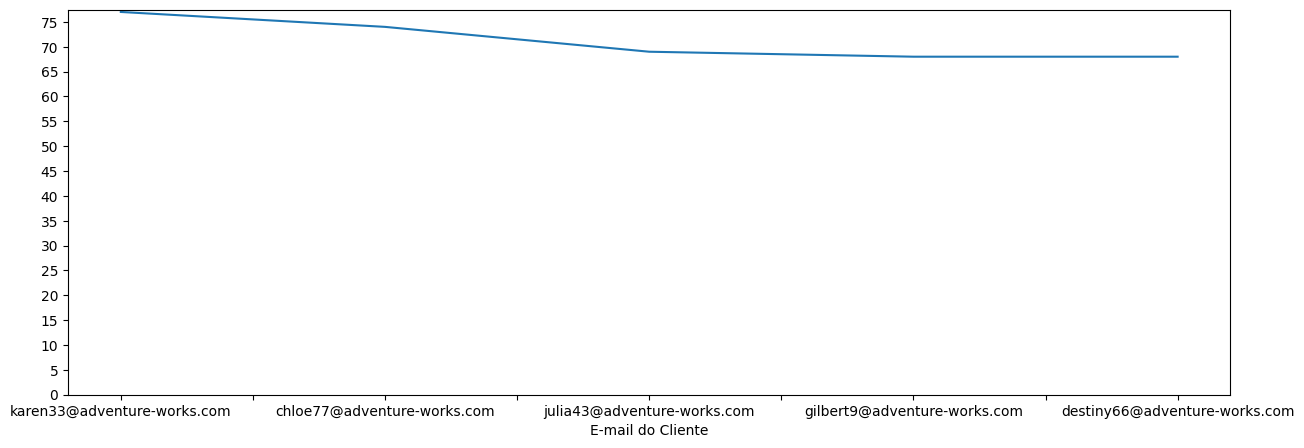

In [17]:
frequencia_clientes = vendas_df['E-mail do Cliente'].value_counts()
display(frequencia_clientes)
frequencia_clientes[:5].plot(figsize=(15,5), yticks=range(0, 80, 5))

### Agora podemos começar as análises